<a href="https://colab.research.google.com/github/niranjanbaviskar/patient-health-data-google-colab/blob/main/PS_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("diabetes_prediction_dataset.csv")
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
import statistics as stats
import scipy.stats as sc
Mean = np.mean(df1['bmi'])
print("Mean :", Mean)
Medain = np.median(df1["bmi"])
print("Medain :", Medain)
mode1 = stats.mode(df1['bmi'])
print("Mode :", mode1)
variance = np.var(df1["bmi"],ddof=1)  ## ddof = 1 is for sample variance
print("Variance :", variance)
std_dev = np.std(df1["bmi"], ddof=1)
print("Standard Deviation :", std_dev)
range_value = np.ptp(df1["bmi"])  ## Peak to Peak
print("Range :" , range_value)
percentile_25 = np.percentile(df1['bmi'], 25)
percentile_75 = np.percentile(df1['bmi'], 75)
print("25th Percentile :" , percentile_25)
print("75th Percentile :" , percentile_75)
skewness = sc.skew(df1['bmi'])
print("Skewness : " , skewness)
kurtosis = sc.kurtosis(df1['bmi'])
print("Kurtosis :" , kurtosis)

Mean : 27.3207671
Medain : 27.32
Mode : 27.32
Variance : 44.04689411951488
Standard Deviation : 6.636783416649581
Range : 85.67999999999999
25th Percentile : 23.63
75th Percentile : 29.58
Skewness :  1.0438198607100957
Kurtosis : 3.5205357642212842


Pearson Correlation: 0.09, P-value: 6.81e-184
Significant correlation between BMI and blood glucose levels


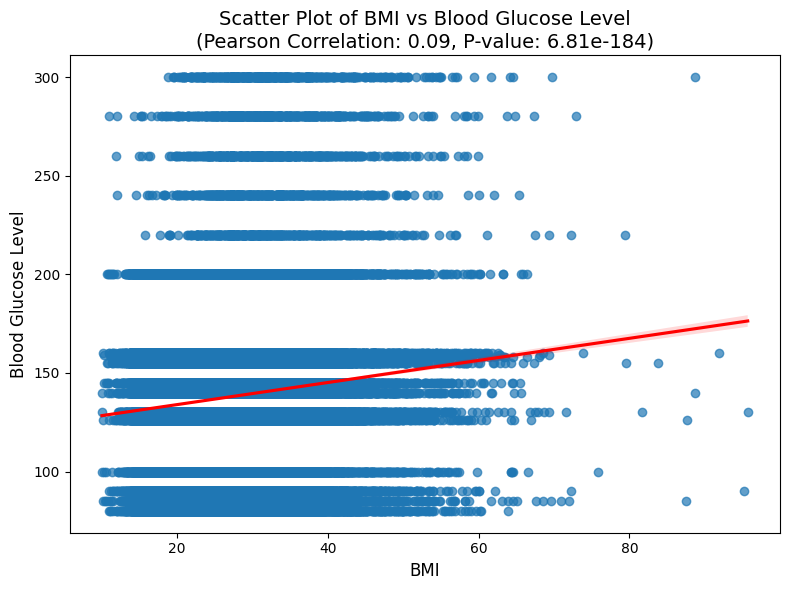

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate Pearson Correlation
corr, p_value = pearsonr(df1['bmi'], df1['blood_glucose_level'])
print(f"Pearson Correlation: {corr:.2f}, P-value: {p_value:.2e}")

# Interpret the result
if p_value < 0.05:
    print("Significant correlation between BMI and blood glucose levels")
else:
    print("No significant correlation between BMI and blood glucose levels")

# Visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='blood_glucose_level', data=df1, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Add title and labels
plt.title(f"Scatter Plot of BMI vs Blood Glucose Level\n(Pearson Correlation: {corr:.2f}, P-value: {p_value:.2e})", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

T-statistic:-18.92118298499434, P-value:1.0525862614635367e-79
Blood glucose levels differ significantly between BMI groups


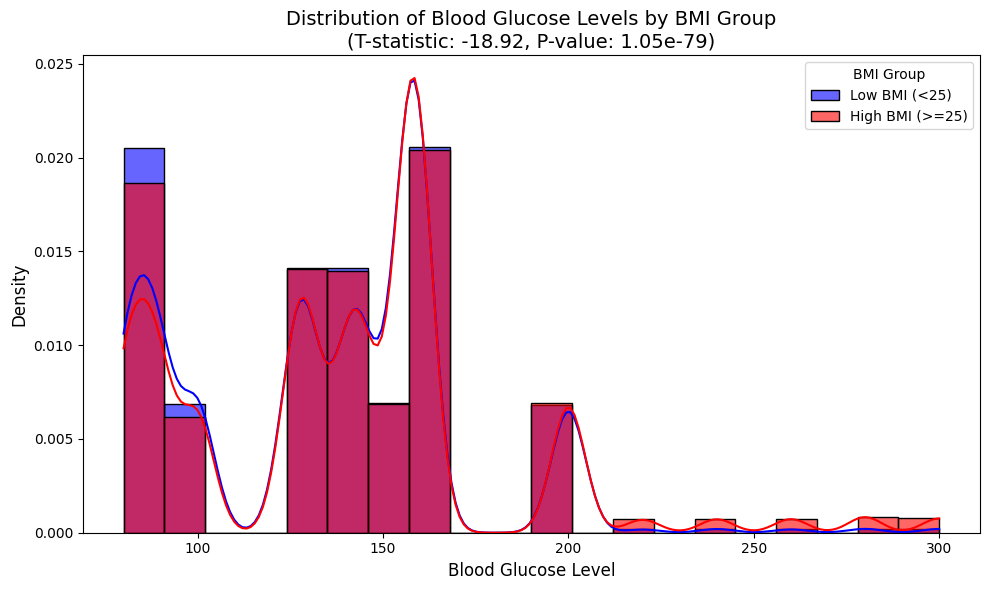

In [ ]:
from scipy.stats import ttest_ind
# Create BMI groups
low_BMI = df1[df1['bmi'] < 25]['blood_glucose_level']
high_BMI = df1[df1['bmi'] >= 25]['blood_glucose_level']
# Two-sample t-test
t_stat, p_value = ttest_ind(low_BMI, high_BMI)
print(f"T-statistic:{t_stat}, P-value:{p_value}")
if p_value < 0.05:
    print("Blood glucose levels differ significantly between BMI groups")
else:
    print("No significant difference in blood glucose levels between BMI groups")

# Combined histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(low_BMI, kde=True, color="blue", label="Low BMI (<25)", stat="density", alpha=0.6, bins=20)
sns.histplot(high_BMI, kde=True, color="red", label="High BMI (>=25)", stat="density", alpha=0.6, bins=20)

# Add title and labels
plt.title(f"Distribution of Blood Glucose Levels by BMI Group\n(T-statistic: {t_stat:.2f}, P-value: {p_value:.2e})", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="BMI Group", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


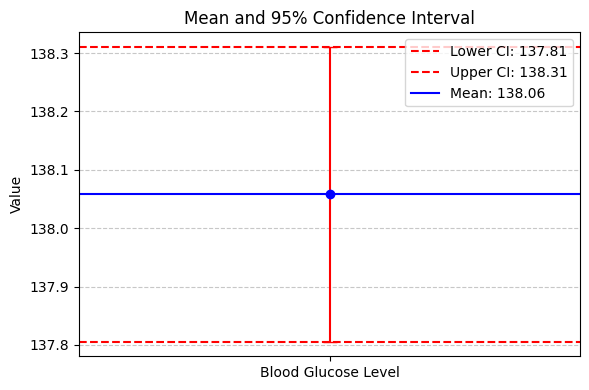

Mean:138.05806, Confidence Interval:(137.80574994112456, 138.31037005887546)


In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
# Calculate confidence intervals
mean = df1['blood_glucose_level'].mean()
std_err = stats.sem(df1['blood_glucose_level'])
ci = stats.t.interval(0.95, len(df1['blood_glucose_level'])-1, loc=mean, scale=std_err)
# Visualization
plt.figure(figsize=(6, 4))
plt.errorbar(1, mean, yerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color='blue', ecolor='red', capsize=5)
plt.axhline(ci[0], color='red', linestyle='--', label=f'Lower CI: {ci[0]:.2f}')
plt.axhline(ci[1], color='red', linestyle='--', label=f'Upper CI: {ci[1]:.2f}')
plt.axhline(mean, color='blue', linestyle='-', label=f'Mean: {mean:.2f}')
# Adding labels and title
plt.xticks([1], ['Blood Glucose Level'])
plt.ylabel('Value')
plt.title('Mean and 95% Confidence Interval')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()
print(f"Mean:{mean}, Confidence Interval:{ci}")

Q1 (25th percentile): 100.0
Q3 (75th percentile): 159.0
IQR: 59.0
Lower Bound: 11.5
Upper Bound: 247.5
Number of Outliers: 2038
Outliers:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
94     Female  60.0             0              0           never  27.32   
104    Female  80.0             1              0           never  27.32   
125    Female  77.0             0              0           never  31.70   
142    Female  80.0             0              0          former  21.97   
...       ...   ...           ...            ...             ...    ...   
99763  Female  50.0             0              0           never  35.91   
99826    Male  63.0             0              1         No Info  27.32   
99867    Male  64.0             1              0          former  33.12   
99938    Male  55.0             0              1          former  30.42   
99957  Female  61.0             0    

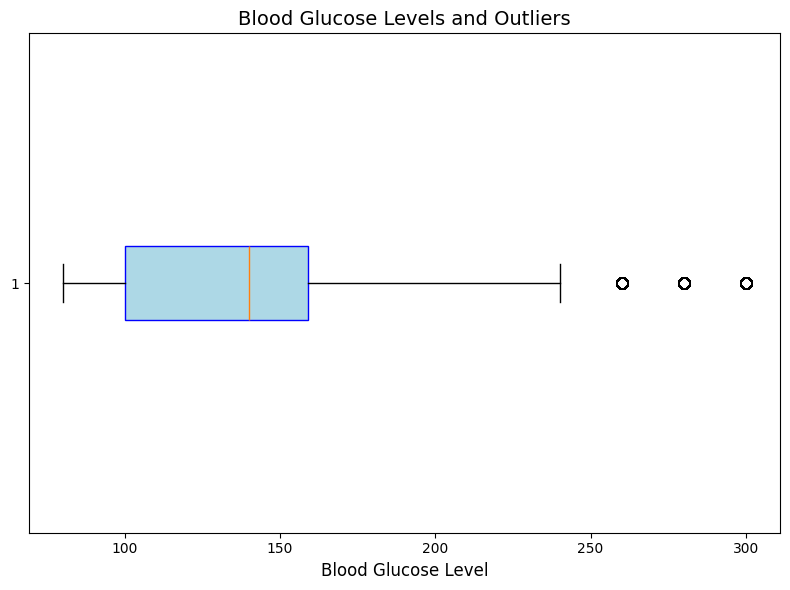

In [ ]:
# Calculate quartiles
Q1 = df1['blood_glucose_level'].quantile(0.25)  # 25th percentile
Q3 = df1['blood_glucose_level'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df1[(df1['blood_glucose_level'] < lower_bound) | (df1['blood_glucose_level'] > upper_bound)]
# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print("Outliers:")
print(outliers)
# Visualize blood glucose levels and outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df1['blood_glucose_level'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(marker='o', color='red', markersize=8))
plt.title('Blood Glucose Levels and Outliers', fontsize=14)
plt.xlabel('Blood Glucose Level', fontsize=12)
plt.tight_layout()
plt.show()


Correlation Matrix:
                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939   
heart_

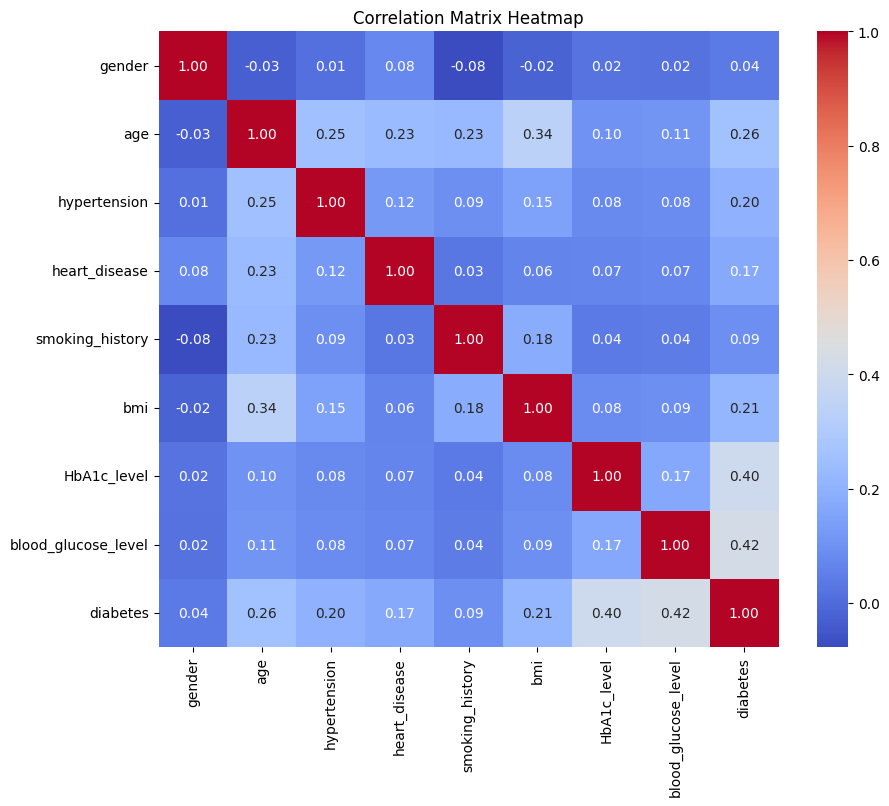

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess categorical variables
# Identify categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using Label Encoding
for col in categorical_columns:
    df1[col] = df1[col].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


F-statistic: 172.12, P-value: 2.74e-39
Variances differ significantly between BMI groups


<ipython-input-9-920a26f4094d>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_BMI, shade=True, color="blue", label="Low BMI (<25)", alpha=0.7)
<ipython-input-9-920a26f4094d>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_BMI, shade=True, color="red", label="High BMI (>=25)", alpha=0.7)


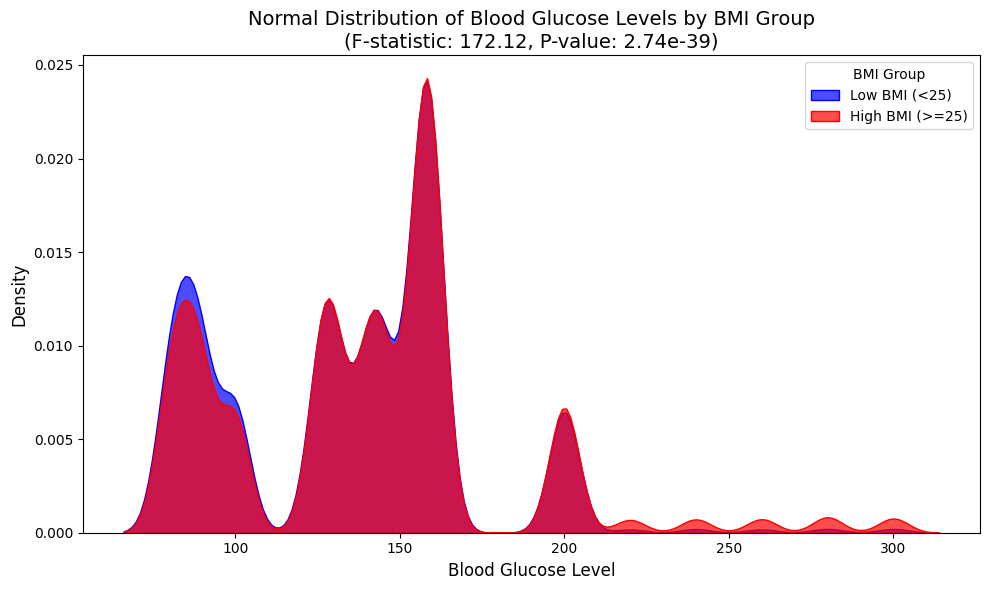

In [ ]:
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns

# F-test for equality of variances
f_stat, p_value_f = levene(low_BMI, high_BMI)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value_f:.2e}")

if p_value_f < 0.05:
    print("Variances differ significantly between BMI groups")
else:
    print("No significant difference in variances between BMI groups")

# Visualization: KDE plot for normal distribution comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(low_BMI, shade=True, color="blue", label="Low BMI (<25)", alpha=0.7)
sns.kdeplot(high_BMI, shade=True, color="red", label="High BMI (>=25)", alpha=0.7)

# Add details to the plot
plt.title(f"Normal Distribution of Blood Glucose Levels by BMI Group\n(F-statistic: {f_stat:.2f}, P-value: {p_value_f:.2e})", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="BMI Group", fontsize=10)
plt.tight_layout()
plt.show()


Chi-square statistic: 66.29, P-value: 3.90e-16
There is a significant association between BMI and blood glucose categories


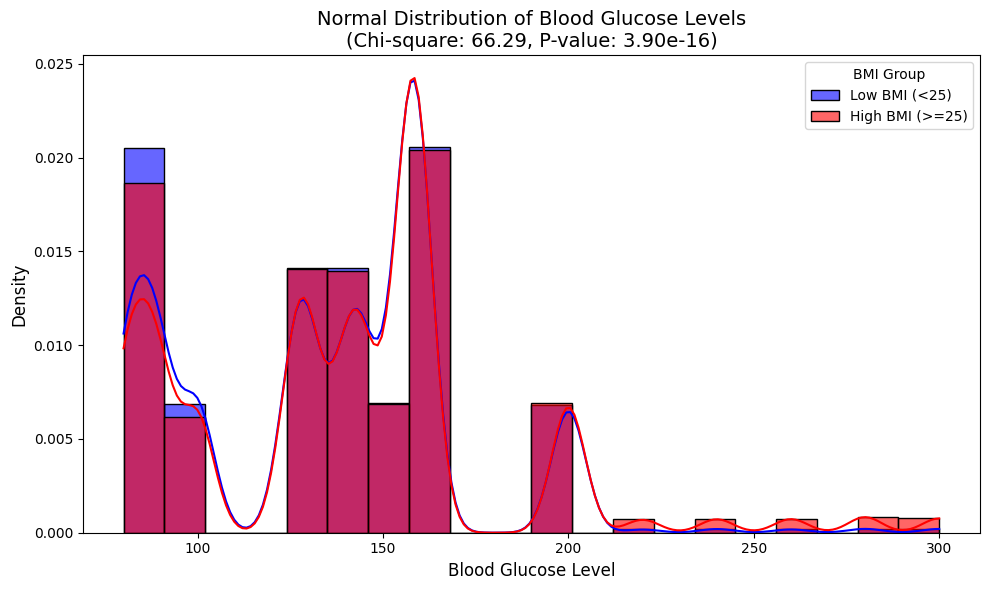

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns

# Categorize blood glucose levels
df1['glucose_category'] = pd.cut(df1['blood_glucose_level'], bins=[0, 140, float('inf')], labels=['Normal', 'High'])

# Create contingency table
contingency_table = pd.crosstab(df1['glucose_category'], df1['bmi'] >= 25)
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.2f}, P-value: {p_value_chi2:.2e}")
if p_value_chi2 < 0.05:
    print("There is a significant association between BMI and blood glucose categories")
else:
    print("No significant association between BMI and blood glucose categories")

# Visualization: Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['bmi'] < 25]['blood_glucose_level'], kde=True, color="blue", label="Low BMI (<25)", alpha=0.6, bins=20, stat="density")
sns.histplot(df1[df1['bmi'] >= 25]['blood_glucose_level'], kde=True, color="red", label="High BMI (>=25)", alpha=0.6, bins=20, stat="density")

# Add details to the plot
plt.title(f"Normal Distribution of Blood Glucose Levels\n(Chi-square: {chi2_stat:.2f}, P-value: {p_value_chi2:.2e})", fontsize=14)
plt.xlabel("Blood Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="BMI Group", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df1[["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level",]]
y = df1['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log= LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log.score(X_test,y_test)

0.95875

In [ ]:
log.score(X_train,y_train)

0.960625

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Feature selection and data splitting
X = df1[["age", "bmi", "HbA1c_level", "blood_glucose_level"]]
y = df1['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
log = LogisticRegression()
log.fit(X_train, y_train)

# Function to predict diabetes based on BMI, blood glucose level, HbA1c level, and age
def predict_diabetes(bmi, blood_glucose_level, HbA1c_level, age):
    sample_data = np.array([[age, bmi, HbA1c_level, blood_glucose_level]])

    # Make a prediction
    prediction = log.predict(sample_data)

    # Output result
    if prediction == 1:
        return f"The person is likely to have diabetes "
    else:
        return f"The person is unlikely to have diabetes "

# Example usage
result = predict_diabetes(bmi=25.1, blood_glucose_level=120, HbA1c_level=5.7, age=25)
print(result)


The person is unlikely to have diabetes 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
